<a href="https://colab.research.google.com/github/YashPatel1604/AI-workshop-UTD/blob/main/PCA_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<function matplotlib.pyplot.show>

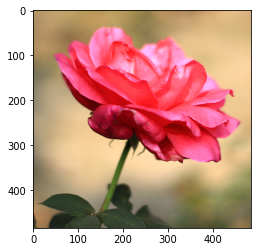

In [ ]:
img = cv2.cvtColor(cv2.imread('Rose.png'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

In [ ]:
img.shape

(485, 485, 3)

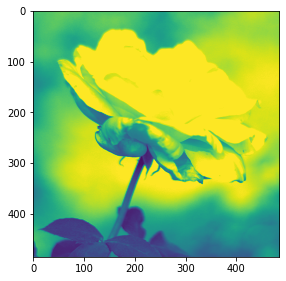

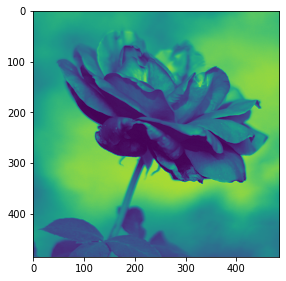

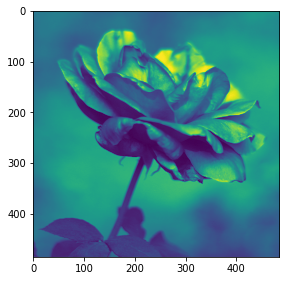

In [ ]:
blue,green,red = cv2.split(img)

f1 = plt.figure(figsize=(15,7.2))
f1.add_subplot(131)
plt.imshow(blue)

f2 = plt.figure(figsize=(15,7.2))
f2.add_subplot(132)
plt.imshow(green)

f3 = plt.figure(figsize=(15,7.2))
f3.add_subplot(133)
plt.imshow(red)


plt.show()

In [ ]:
green_temp_df = pd.DataFrame(data=green)
blue_temp_df = pd.DataFrame(data=blue)
red_temp_df = pd.DataFrame(data=red)
green_df = green_temp_df/255
blue_df = blue_temp_df/255
red_df = red_temp_df/255

In [ ]:
pca_g = PCA(n_components=50)
pca_g.fit(green_df)

PCA(n_components=50)

In [ ]:
sum(pca_g.explained_variance_)

22.60586622102996

In [ ]:
sum(pca_g.explained_variance_ratio_)

0.9906054212699071

In [ ]:
pca_r = PCA(n_components=50)
pca_r.fit(red_df)
sum(pca_r.explained_variance_ratio_)

0.9840899526429719

In [ ]:
pca_b = PCA(n_components=50)
pca_b.fit(blue_df)
sum(pca_b.explained_variance_ratio_)

0.993395724217613

In [ ]:
t_g = pca_g.transform(green_df)
t_g.shape

(485, 50)

In [ ]:
t_b = pca_b.transform(blue_df)
t_b.shape

(485, 50)

In [ ]:
t_r = pca_r.transform(red_df)
t_r.shape

(485, 50)

In [ ]:
g_re = pca_g.inverse_transform(t_g)
b_re = pca_b.inverse_transform(t_b)
r_re = pca_r.inverse_transform(t_r)

In [ ]:
img_reduced = (cv2.merge((b_re,g_re,r_re)))
print(img_reduced.shape)

(485, 485, 3)


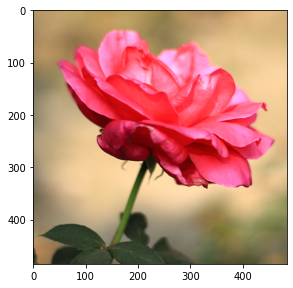

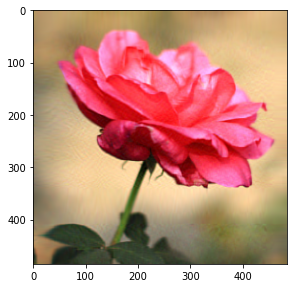

In [ ]:
org_fig = plt.figure(figsize=(10,7.2))
org_fig.add_subplot(121)
plt.imshow(img)

rec_fig = plt.figure(figsize=(10,7.2))
rec_fig.add_subplot(121)
plt.imshow(img_reduced)